In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


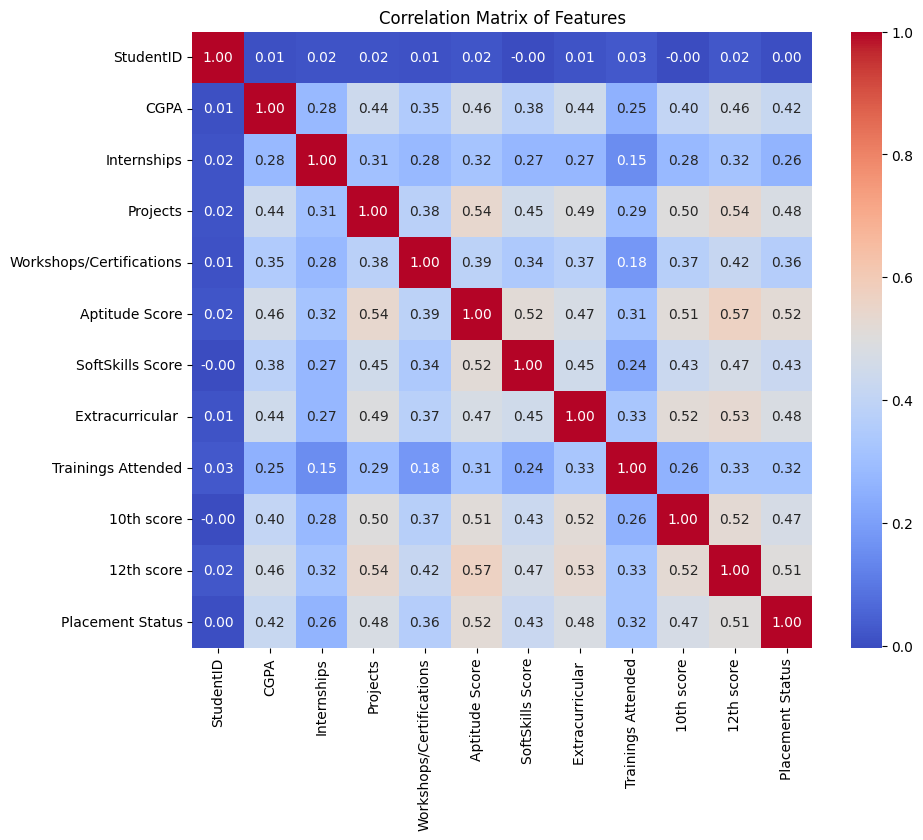

Correlation of 10th score with Placement Status: 0.47
Correlation of 12th score with Placement Status: 0.51


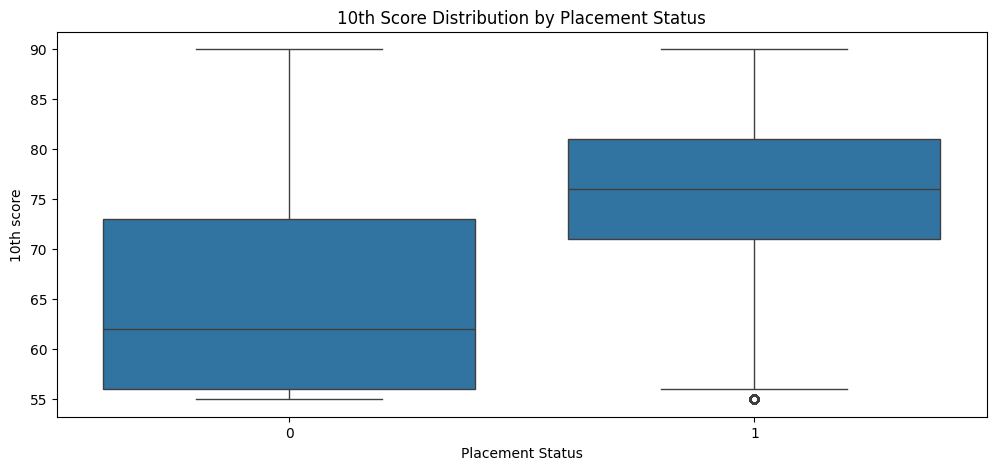

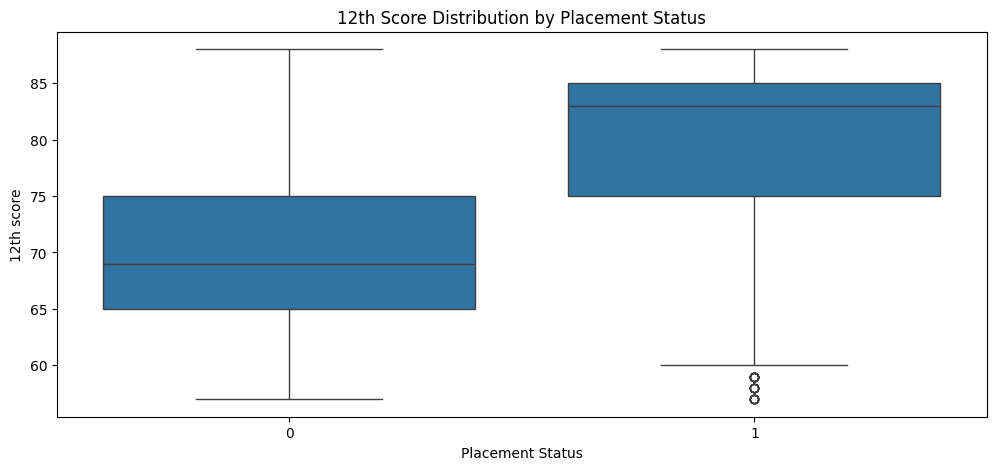

Feature Importance:
                     Feature  Importance
10                12th score    0.193110
5             Aptitude Score    0.146818
0                  StudentID    0.115993
9                 10th score    0.107104
1                       CGPA    0.101314
3                   Projects    0.082686
6           SoftSkills Score    0.079182
7           Extracurricular     0.069352
4   Workshops/Certifications    0.053707
2                Internships    0.027339
8         Trainings Attended    0.023395


<ipython-input-8-c002b2af7da5>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


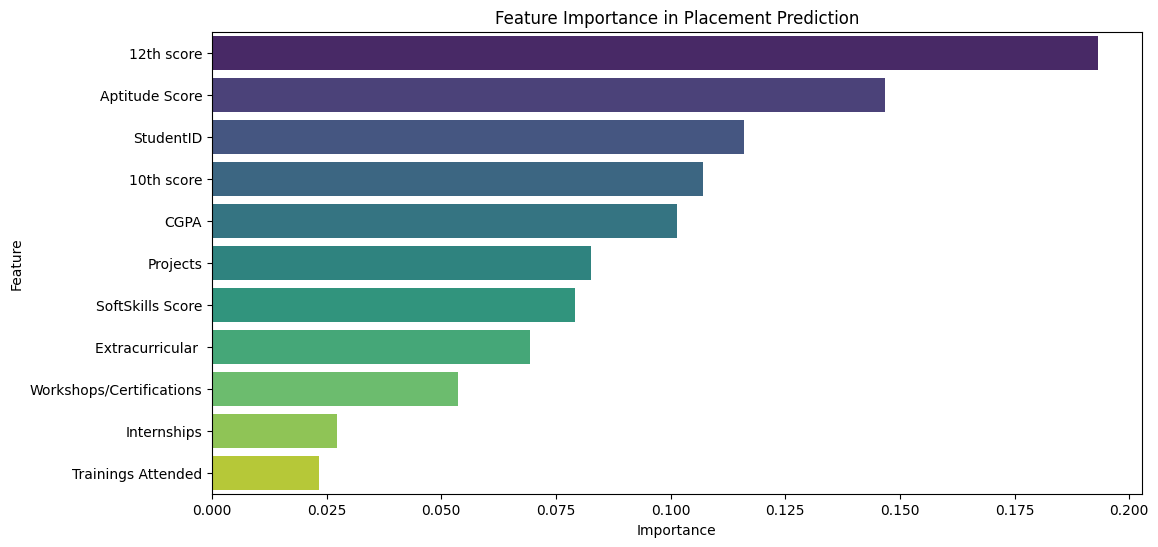

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/content/drive/MyDrive/Placement Data/placementdata.csv"  # Update with the actual Excel file path
data = pd.read_csv(file_path)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

correlation_10th = correlation_matrix.loc["10th score", "Placement Status"]
correlation_12th = correlation_matrix.loc["12th score", "Placement Status"]

print(f"Correlation of 10th score with Placement Status: {correlation_10th:.2f}")
print(f"Correlation of 12th score with Placement Status: {correlation_12th:.2f}")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Placement Status", y="10th score", data=data)
plt.title("10th Score Distribution by Placement Status")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="Placement Status", y="12th score", data=data)
plt.title("12th Score Distribution by Placement Status")
plt.show()

X = data.drop(['Placement Status'], axis=1)
y = data['Placement Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



feature_importances = pd.DataFrame({
    "Feature": data.drop("Placement Status", axis=1).columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(feature_importances)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance in Placement Prediction")
plt.show()


<ipython-input-9-e38898149bd4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Placement Status", data=data, palette="viridis")


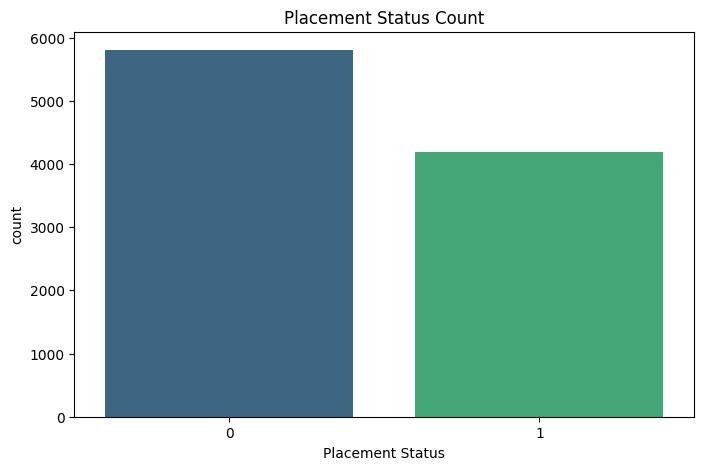

<ipython-input-9-e38898149bd4>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")
<ipython-input-9-e38898149bd4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")


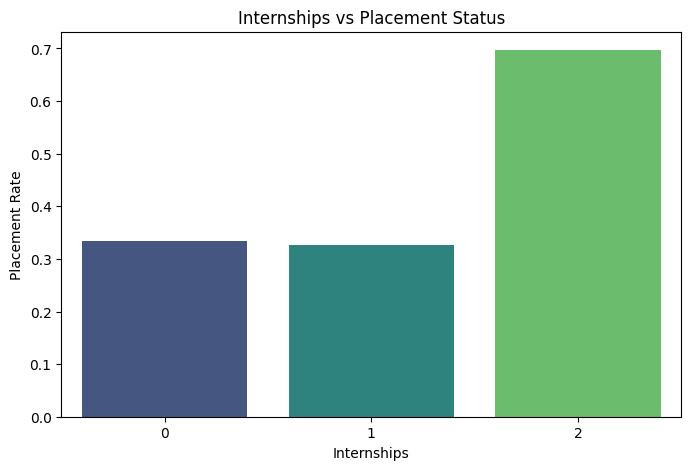

<ipython-input-9-e38898149bd4>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")
<ipython-input-9-e38898149bd4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")


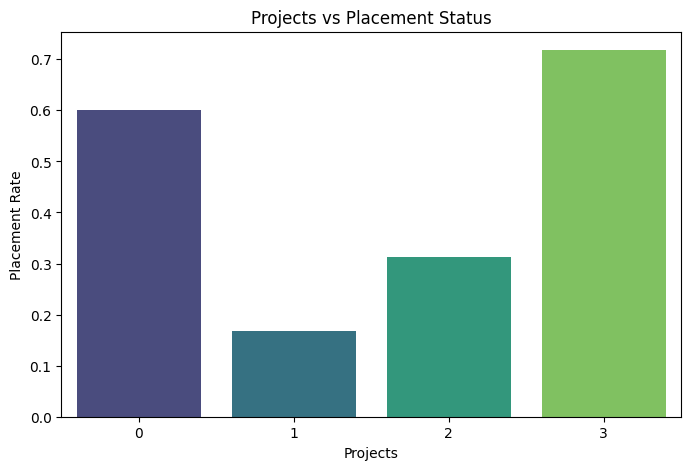

<ipython-input-9-e38898149bd4>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")
<ipython-input-9-e38898149bd4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")


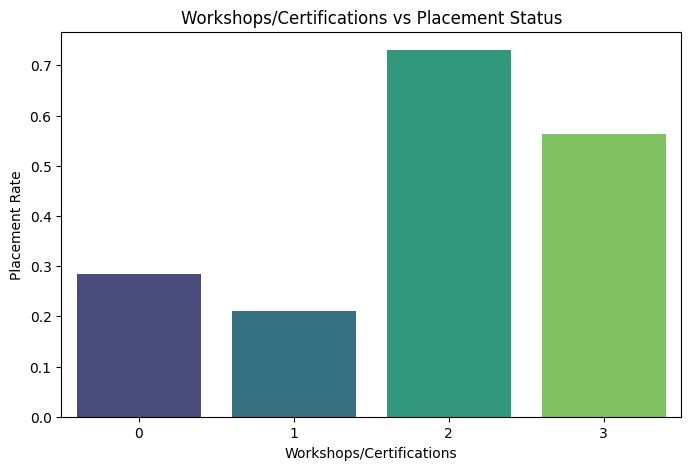

<ipython-input-9-e38898149bd4>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")


ValueError: Could not interpret value `Extracurricular` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset from the specified sheet in the Excel file
file_path = "/content/drive/MyDrive/Placement Data/placementdata.csv"  # Replace with the actual Excel file path
data = pd.read_csv(file_path)



plt.figure(figsize=(8, 5))
sns.countplot(x="Placement Status", data=data, palette="viridis")
plt.title("Placement Status Count")
plt.show()

for feature in ['Internships', 'Projects', 'Workshops/Certifications', 'Extracurricular', 'Trainings Attended']:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature, y="Placement Status", data=data, ci=None, palette="viridis")
    plt.title(f"{feature} vs Placement Status")
    plt.xlabel(feature)
    plt.ylabel("Placement Rate")
    plt.show()

X = data.drop(['Placement Status'], axis=1)
y = data['Placement Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": data.drop("Placement Status", axis=1).columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance in Placement Prediction")
plt.show()

print("Feature Importance:")
print(feature_importances)


Accuracy: 0.79
Confusion Matrix:
 [[981 191]
 [223 605]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1172
           1       0.76      0.73      0.75       828

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.79      2000
weighted avg       0.79      0.79      0.79      2000



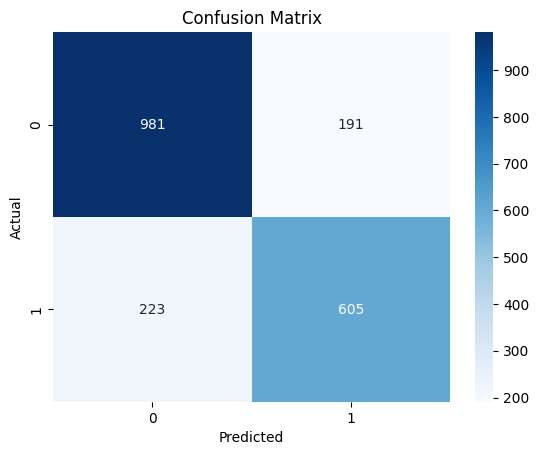

In [10]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()